# Introduction

Customer churn is a significant concern for businesses across various industries. Predicting customer churn can help businesses take proactive measures to retain their customers and improve their bottom line. In this project, I have used various machine learning algorithms to select a best model

Finally Used Principal Component Analysis (PCA) as Feature Selection Method with AdaBoostClassifier.

In order to predict customer churn. We have also performed data preprocessing, Exploratory Data Analysis (EDA), Predictive Modeling and Hyperparameter Tuning

In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

Creating a custom palette using sns.color_palette() is useful when you want to ensure that your specified colors are used consistently across multiple Seaborn plots and that they override the default color choices provided by Seaborn

In [2]:
my_colors = ["#c6b34e","#95354a", "#57b9a8","#b0ddff", "#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861","#426872"]

# Create a seaborn palette object
my_palette=sns.color_palette(my_colors)

#using custom palette with seaborn function
sns.set_palette(my_palette)

from matplotlib.colors import ListedColormap
colors = ['#ffffcd', '#ffeaa4', '#ffca2a','#c6b34e']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)
%matplotlib inline

In [3]:
#pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\hp-laptop\Desktop\customer_churn_large_dataset (1).csv")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


>Displaying the balance of the class labels (churn) with a Count plot.

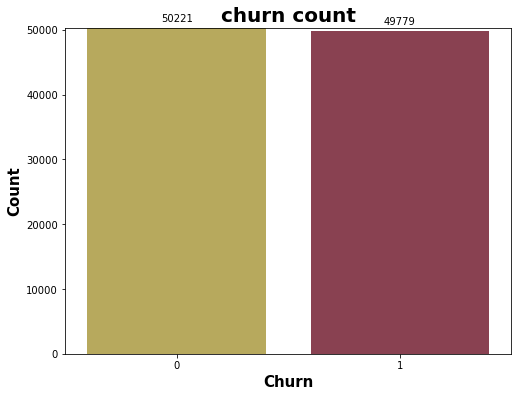

In [8]:
#Create the count plot
plt.figure(figsize=(8,6))
ax=sns.countplot(data=df,x="Churn")

#To Display counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')

#Setting y-axis limit
ax.set_ylim(0,max(df['Churn'].value_counts())+100)
plt.title('churn count',fontsize=20,fontweight='bold')
plt.xlabel('Churn',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')
plt.show()

>Distribution of total charges between churn categories

Text(0, 0.5, 'Monthly_Bill')

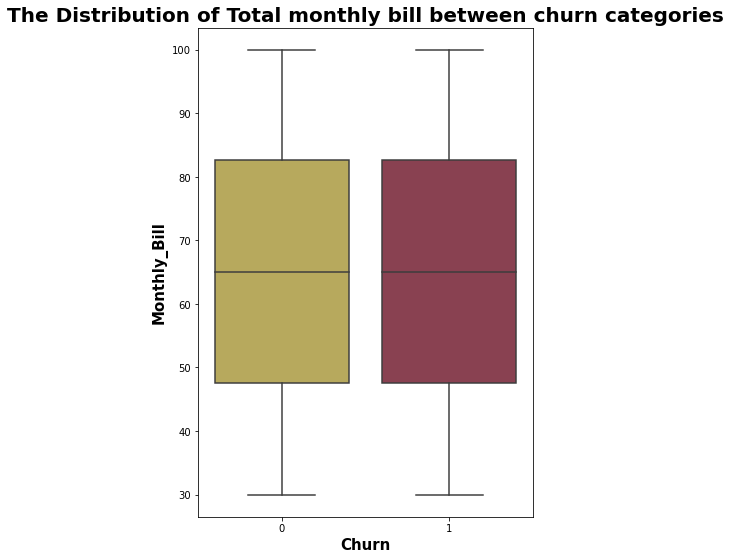

In [9]:
plt.figure(figsize=(6,9))
sns.boxplot(data=df,x="Churn",y="Monthly_Bill")
plt.title('The Distribution of Total monthly bill between churn categories',fontsize=20,fontweight='bold')
plt.xlabel('Churn',fontsize=15,fontweight='bold')
plt.ylabel('Monthly_Bill',fontsize=15,fontweight='bold')

In [10]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [11]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

>Creating a bar plot showing the correlation of the following features to the class label, for the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.

<AxesSubplot:>

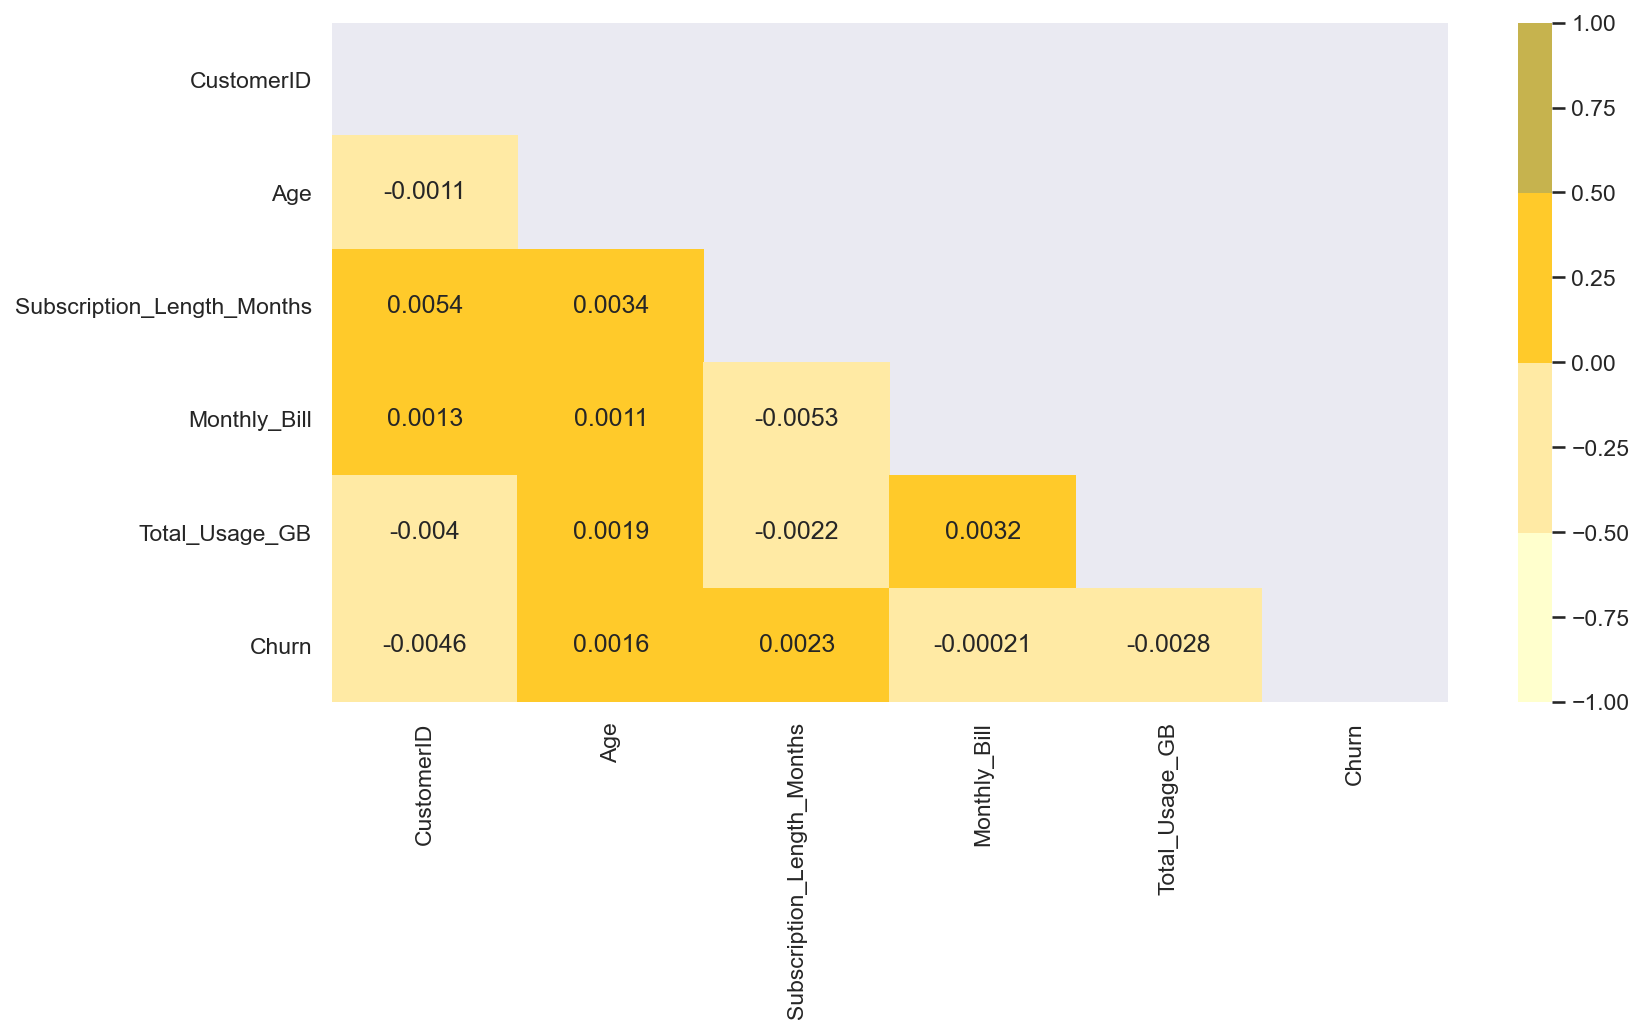

In [60]:
feature_corr = df.corr()
mask = np.zeros_like(feature_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(feature_corr, annot=True, mask=mask, vmin=-1, vmax=1, center=0,cmap=cmap)

In [15]:
cat_col=df.select_dtypes('object').columns.tolist()
cat_col

['Name', 'Gender', 'Location']

In [16]:
num_col=df.select_dtypes(include='number').columns.tolist()
num_col

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

## Preprocessing

In [32]:
no_churn=df.groupby(['Churn','Total_Usage_GB']).count().transpose()[0]
yes_churn=df.groupby(['Churn','Total_Usage_GB']).count().transpose()[1]

In [33]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
churn_rate.transpose()['CustomerID']

Total_Usage_GB
50     47.826087
51     49.763033
52     57.894737
53     53.703704
54     49.514563
         ...    
496    46.636771
497    48.636364
498    49.275362
499    50.847458
500    43.265306
Name: CustomerID, Length: 451, dtype: float64

Text(0, 0.5, 'Churn Percentage')

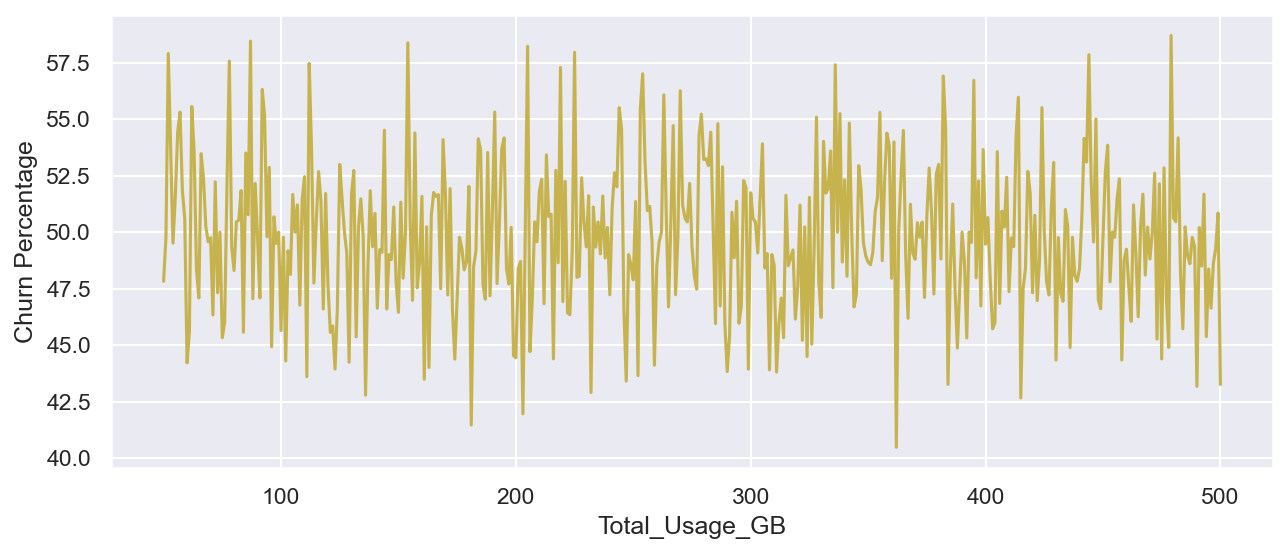

In [42]:
plt.figure(figsize=(10,4),dpi=150)
sns.set_theme(style="darkgrid")
churn_rate.iloc[0].plot(color='#c6b34e')
plt.ylabel('Churn Percentage')

Text(0, 0.5, 'Churn Percentage')

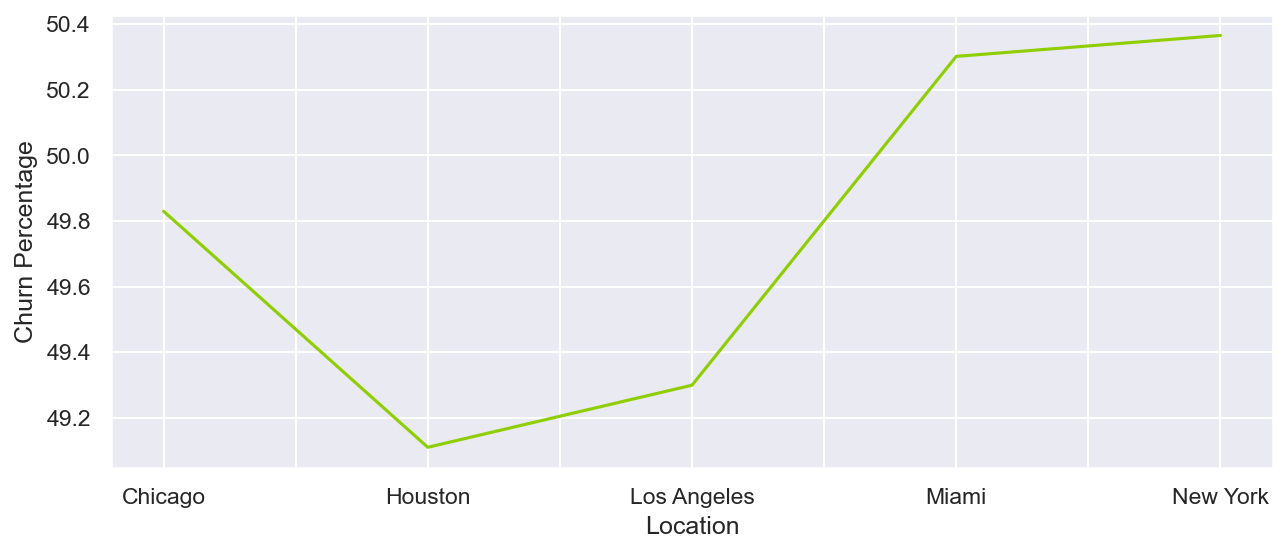

In [44]:
no_churn1=df.groupby(['Churn','Location',]).count().transpose()[0]
yes_churn1=df.groupby(['Churn','Location']).count().transpose()[1]

churn_rate1 = 100 * yes_churn1 / (no_churn1+yes_churn1)
churn_rate1.transpose()['CustomerID']

plt.figure(figsize=(10,4),dpi=150)
sns.set_theme(style="darkgrid")
churn_rate1.iloc[0].plot(color="#8fce00")
plt.ylabel('Churn Percentage')

Text(0, 0.5, 'Churn Percentage')

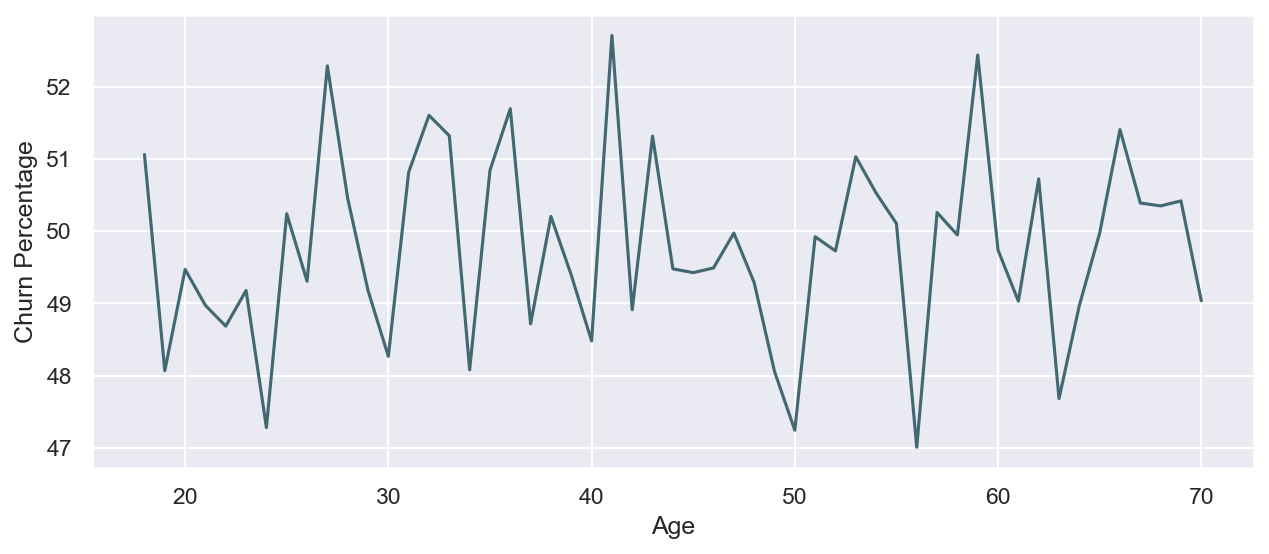

In [43]:
no_churn2=df.groupby(['Churn','Age',]).count().transpose()[0]
yes_churn2=df.groupby(['Churn','Age']).count().transpose()[1]

churn_rate2 = 100 * yes_churn2 / (no_churn2+yes_churn2)
churn_rate2.transpose()['CustomerID']

plt.figure(figsize=(10,4),dpi=150)
sns.set_theme(style="darkgrid")
churn_rate2.iloc[0].plot(color='#426872')
plt.ylabel('Churn Percentage')

In [45]:
#
#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861","#426872"]

def cohort(Age):
    if Age < 20:
        return "0-19 Age"
    elif Age < 40:
        return "20-39 Age"
    elif Age < 60:
        return "40-59 Age"
    else:
        return "Over 60"

In [46]:
df['Age_cohort']= df['Age'].apply(cohort)

In [47]:
df.head(10)[['Age','Age_cohort']]

,Age,Age_cohort
0,63,Over 60
1,62,Over 60
2,24,20-39 Age
3,36,20-39 Age
4,46,40-59 Age
5,67,Over 60
6,30,20-39 Age
7,67,Over 60
8,20,20-39 Age
9,53,40-59 Age


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


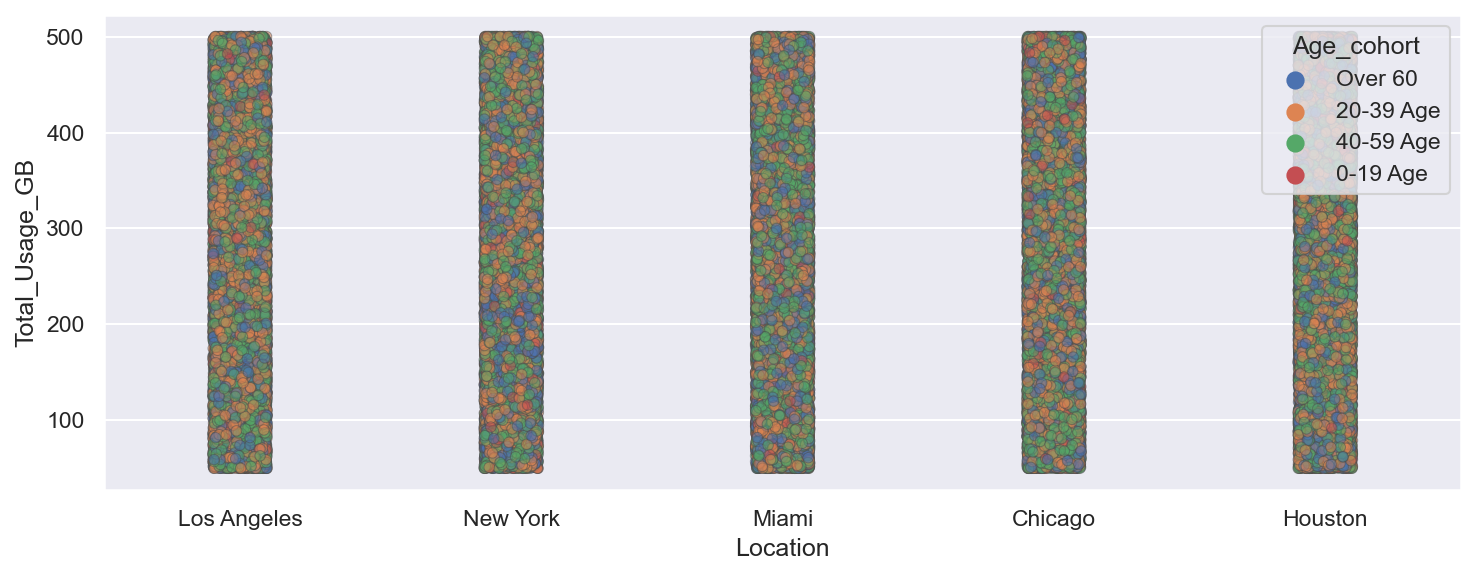

In [105]:
plt.figure(figsize=(10,4),dpi=150)
sns.stripplot(data=df,x='Location',y='Total_Usage_GB',hue='Age_cohort',linewidth=0.5,alpha=0.5)
plt.tight_layout()
plt.show()

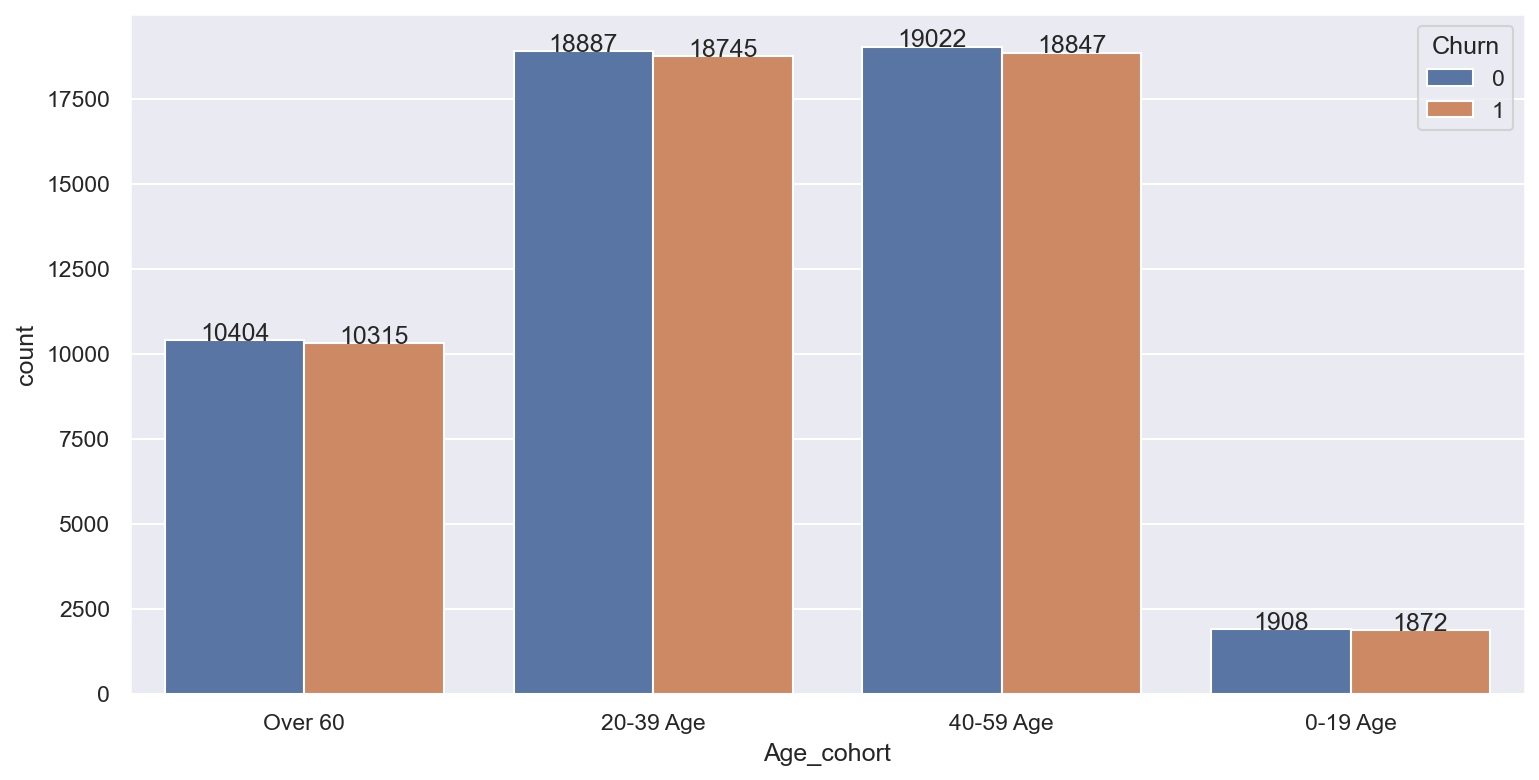

In [59]:
plt.figure(figsize=(12,6),dpi=150)
ax = sns.countplot(data=df,x='Age_cohort',hue='Churn')
colors = sns.color_palette(my_colors)
# add labels to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + 0.2, p.get_height() + 1), ha='center')
plt.show()

## Droping Name Column as there is no specified information given 

In [63]:
df.drop('Name',axis=1,inplace=True)

In [64]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_cohort
0,1,63,Male,Los Angeles,17,73.36,236,0,Over 60
1,2,62,Female,New York,1,48.76,172,0,Over 60
2,3,24,Female,Los Angeles,5,85.47,460,0,20-39 Age
3,4,36,Female,Miami,3,97.94,297,1,20-39 Age
4,5,46,Female,Miami,19,58.14,266,0,40-59 Age


## Changing Data type

In [67]:
df['Gender'].replace(['Female','Male'],[1,0],inplace=True)

In [68]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_cohort
0,1,63,0,Los Angeles,17,73.36,236,0,Over 60
1,2,62,1,New York,1,48.76,172,0,Over 60
2,3,24,1,Los Angeles,5,85.47,460,0,20-39 Age
3,4,36,1,Miami,3,97.94,297,1,20-39 Age
4,5,46,1,Miami,19,58.14,266,0,40-59 Age


### Separating Features and Target

In [70]:
x=df.iloc[:,:-2]
y=df['Churn']

In [71]:
x

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,0,Los Angeles,17,73.36,236
1,2,62,1,New York,1,48.76,172
2,3,24,1,Los Angeles,5,85.47,460
3,4,36,1,Miami,3,97.94,297
4,5,46,1,Miami,19,58.14,266
...,...,...,...,...,...,...,...
99995,99996,33,0,Houston,23,55.13,226
99996,99997,62,1,New York,19,61.65,351
99997,99998,64,0,Chicago,17,96.11,251
99998,99999,51,1,New York,20,49.25,434


In [72]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

## Encoding

In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
oe=OrdinalEncoder()
x['Location']=oe.fit_transform(x[['Location']])

In [77]:
x

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,0,2.0,17,73.36,236
1,2,62,1,4.0,1,48.76,172
2,3,24,1,2.0,5,85.47,460
3,4,36,1,3.0,3,97.94,297
4,5,46,1,3.0,19,58.14,266
...,...,...,...,...,...,...,...
99995,99996,33,0,1.0,23,55.13,226
99996,99997,62,1,4.0,19,61.65,351
99997,99998,64,0,0.0,17,96.11,251
99998,99999,51,1,4.0,20,49.25,434


### Data Splitting

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [86]:
#Creating objects of all class
lreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()

In [80]:
from sklearn import metrics
from sklearn.metrics import auc,roc_curve,RocCurveDisplay

In [87]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print(f"Accuracy: {ac} \n\n Confusion Matrix: \n{cm} \n\n Classification Report: \n{cr}")

In [88]:
mymodel(lreg)

Accuracy: 0.5036666666666667 

 Confusion Matrix: 
[[15110     0]
 [14890     0]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     15110
           1       0.00      0.00      0.00     14890

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.34     30000



In [89]:
mymodel(knn)

Accuracy: 0.49943333333333334 

 Confusion Matrix: 
[[7672 7438]
 [7579 7311]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15110
           1       0.50      0.49      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [90]:
mymodel(svm)

Accuracy: 0.5051333333333333 

 Confusion Matrix: 
[[13120  1990]
 [12856  2034]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.51      0.87      0.64     15110
           1       0.51      0.14      0.22     14890

    accuracy                           0.51     30000
   macro avg       0.51      0.50      0.43     30000
weighted avg       0.51      0.51      0.43     30000



In [91]:
mymodel(dt)

Accuracy: 0.49843333333333334 

 Confusion Matrix: 
[[7527 7583]
 [7464 7426]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15110
           1       0.49      0.50      0.50     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [92]:
mymodel(rf)

Accuracy: 0.4983666666666667 

 Confusion Matrix: 
[[8023 7087]
 [7962 6928]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     15110
           1       0.49      0.47      0.48     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [93]:
mymodel(nb)

Accuracy: 0.5052333333333333 

 Confusion Matrix: 
[[9590 5520]
 [9323 5567]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.51      0.63      0.56     15110
           1       0.50      0.37      0.43     14890

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.51      0.50     30000



In [95]:
bg=BaggingClassifier(GaussianNB())
bg.fit(xtrain, ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.51      0.61      0.55     15110
           1       0.50      0.39      0.44     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [96]:
#creating empty list
model=[]
acc=[]
model.append(("GaussianNB",GaussianNB()))
model.append(("svm",SVC()))

In [97]:
model

[('GaussianNB', GaussianNB()), ('svm', SVC())]

In [100]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=model)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.91      0.65     15110
           1       0.51      0.09      0.16     14890

    accuracy                           0.51     30000
   macro avg       0.51      0.50      0.40     30000
weighted avg       0.51      0.51      0.41     30000



In [101]:
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.57      0.54     15110
           1       0.50      0.43      0.46     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [103]:
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52     15110
           1       0.50      0.45      0.47     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [104]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     15110
           1       0.50      0.48      0.49     14890

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



## Hyperparameter Tunning

In [ ]:
classifiers = {
    'SVM': {
        'classifier': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'LogisticRegression': {
        'classifier': LogisticRegression(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['sag','saga']
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'DecisionTree': {
        'classifier': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30]
        }
    },
    'KNN': {
        'classifier': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    }
}

In [ ]:
#Create a list to store results
results = []

# Loop through each classifier and perform hyperparameter tuning
for classifier_name, classifier_config in classifiers.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('classifier', classifier_config['classifier'])
    ])
    
    param_grid = classifier_config['params']
    
    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid_search.fit(xtrain, ytrain)
    
    # Evaluate the model on the test set
    test_score = grid_search.score(xtest,ytest)
    
    results.append({
        'Classifier': classifier_name,
        'Best_Parameters': grid_search.best_params_,
        'Test_Score': test_score
    })

# Display the results
for result in results:
    print(f"Classifier: {result['Classifier']}")
    print(f"Best Parameters: {result['Best_Parameters']}")
    print(f"Test Score: {result['Test_Score']}\n")


### Evaluating